# Italian GP 2022 resume

This jupyter notebook contains some insights about the Italin Grand Prix runned in Autodromo Nazionale Monza on Septembre 11th 2022

## Setup

First let's load some libraries that will be useful

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Load information

The information is taken from the website of pitwall.app, the data is the time lap from the drivers and the position, let's load the information of the top 6 drivers: Max, Leclerc, Russell, Sainz, Hamilton and Perez

First lets load the information of Max and Leclerc

In [2]:
info_1_2 = pd.read_html('https://pitwall.app/compare-lap-times?utf8=%E2%9C%93&season=74&race=1171&main_driver=14&compare_driver=3&button=')[0]

In [3]:
info_1_2.head()

,Lap,Driver,Pos,Time VER,Driver.1,Pos.1,Time LEC,Delta
0,1,#33 Max Verstappen,4th,1:30.827,#16 Charles Leclerc,1st,1:28.085,2.742
1,2,#33 Max Verstappen,3rd,1:26.401,#16 Charles Leclerc,1st,1:26.535,-0.134
2,3,#33 Max Verstappen,3rd,1:26.181,#16 Charles Leclerc,1st,1:26.352,-0.171
3,4,#33 Max Verstappen,3rd,1:25.782,#16 Charles Leclerc,1st,1:25.802,-0.020
4,5,#33 Max Verstappen,2nd,1:25.512,#16 Charles Leclerc,1st,1:25.902,-0.390


In [4]:
lap_ver = info_1_2.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time LEC','Delta'])
lap_ver['Pos'] = [int(x[:-2]) for x in list(lap_ver['Pos'])]

In [5]:
lap_ver.head()

,Pos,Time VER
Lap,,
1,4,1:30.827
2,3,1:26.401
3,3,1:26.181
4,3,1:25.782
5,2,1:25.512


In [6]:
lap_lec = info_1_2.set_index('Lap').drop(columns=['Driver','Pos','Time VER','Driver.1','Delta'])
lap_lec = lap_lec.rename(columns={'Pos.1':'Pos'})
lap_lec['Pos'] = [int(x[:-2]) for x in list(lap_lec['Pos'])]

In [7]:
lap_lec.head()

,Pos,Time LEC
Lap,,
1,1,1:28.085
2,1,1:26.535
3,1,1:26.352
4,1,1:25.802
5,1,1:25.902


Now for the third and fourth place Russell and Sainz

In [8]:
info_3_4 = pd.read_html('https://pitwall.app/compare-lap-times?utf8=%E2%9C%93&season=74&race=1171&main_driver=20&compare_driver=8&button=')[0]

In [9]:
info_3_4.head()

,Lap,Driver,Pos,Time RUS,Driver.1,Pos.1,Time SAI,Delta
0,1,#63 George Russell,2nd,1:29.427,#55 Carlos Sainz,16th,1:36.448,-7.021
1,2,#63 George Russell,2nd,1:26.724,#55 Carlos Sainz,14th,1:29.685,-2.961
2,3,#63 George Russell,2nd,1:26.432,#55 Carlos Sainz,14th,1:27.539,-1.107
3,4,#63 George Russell,2nd,1:26.143,#55 Carlos Sainz,13th,1:27.044,-0.901
4,5,#63 George Russell,3rd,1:26.878,#55 Carlos Sainz,11th,1:26.543,0.335


In [10]:
lap_rus = info_3_4.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time SAI','Delta'])
lap_rus['Pos'] = [int(x[:-2]) for x in list(lap_rus['Pos'])]

In [11]:
lap_rus.head()

,Pos,Time RUS
Lap,,
1,2,1:29.427
2,2,1:26.724
3,2,1:26.432
4,2,1:26.143
5,3,1:26.878


In [12]:
lap_sai = info_3_4.set_index('Lap').drop(columns=['Driver','Pos','Time RUS','Driver.1','Delta'])
lap_sai = lap_sai.rename(columns={'Pos.1':'Pos'})
lap_sai['Pos'] = [int(x[:-2]) for x in list(lap_sai['Pos'])]

In [13]:
lap_sai.head()

,Pos,Time SAI
Lap,,
1,16,1:36.448
2,14,1:29.685
3,14,1:27.539
4,13,1:27.044
5,11,1:26.543


Finally lets take the data from the fifth and sixth place Hamilton and Perez

In [14]:
info_5_6 = pd.read_html('https://pitwall.app/compare-lap-times?utf8=%E2%9C%93&season=74&race=1171&main_driver=10&compare_driver=11&button=')[0]

In [15]:
info_5_6.head()

,Lap,Driver,Pos,Time HAM,Driver.1,Pos.1,Time PER,Delta
0,1,#44 Lewis Hamilton,19th,1:37.652,#11 Sergio PÃ©rez,15th,1:36.234,1.418
1,2,#44 Lewis Hamilton,18th,1:30.032,#11 Sergio PÃ©rez,16th,1:30.459,-0.427
2,3,#44 Lewis Hamilton,18th,1:28.954,#11 Sergio PÃ©rez,15th,1:27.557,1.397
3,4,#44 Lewis Hamilton,18th,1:28.153,#11 Sergio PÃ©rez,14th,1:27.263,0.890
4,5,#44 Lewis Hamilton,18th,1:27.806,#11 Sergio PÃ©rez,14th,1:27.266,0.540


In [16]:
lap_ham = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos.1','Time PER','Delta'])
lap_ham['Pos'] = [int(x[:-2]) for x in list(lap_ham['Pos'])]

In [17]:
lap_ham.head()

,Pos,Time HAM
Lap,,
1,19,1:37.652
2,18,1:30.032
3,18,1:28.954
4,18,1:28.153
5,18,1:27.806


In [18]:
lap_per = info_5_6.set_index('Lap').drop(columns=['Driver','Driver.1','Pos','Time HAM','Delta'])
lap_per = lap_per.rename(columns={'Pos.1':'Pos'})
lap_per['Pos'] = [int(x[:-2]) for x in list(lap_per['Pos'])]

In [19]:
lap_per.head()

,Pos,Time PER
Lap,,
1,15,1:36.234
2,16,1:30.459
3,15,1:27.557
4,14,1:27.263
5,14,1:27.266


## Comparison of times of the first six drivers

The first graph will be a timeseries plot of the the lap time of each pilot

In [20]:
lapg = range(1,54)
laptV = list(lap_ver['Time VER'])
laptP = list(lap_per['Time PER'])
laptS = list(lap_sai['Time SAI'])
laptR = list(lap_rus['Time RUS'])
laptH = list(lap_ham['Time HAM'])
laptL = list(lap_lec['Time LEC'])

In [21]:
x = lapg
yV = mdates.datestr2num(laptV)
yP = mdates.datestr2num(laptP)
yS = mdates.datestr2num(laptS)
yR = mdates.datestr2num(laptR)
yH = mdates.datestr2num(laptH)
yL = mdates.datestr2num(laptL)

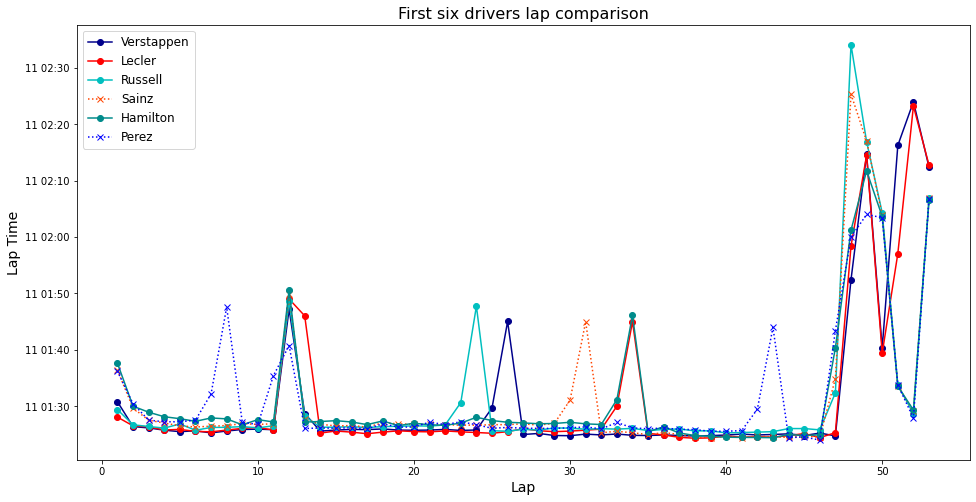

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x,yV, color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x,yL,'ro-', label='Lecler')
ax.plot(x,yR,'co-', label='Russell')
ax.plot(x,yS, color='orangered', linestyle='dotted', marker='x', label='Sainz')
ax.plot(x,yH, color='darkcyan', linestyle='solid', marker='o', label='Hamilton')
ax.plot(x,yP,'bx:', label='Perez')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap',fontsize=14)
ax.set_title('First six drivers lap comparison', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison.jpeg')

The last laps after the problem with Daniel Ricciardo car, that results in a safety car, will be removed, after lap 48. This will allow to show us the fastest cars.

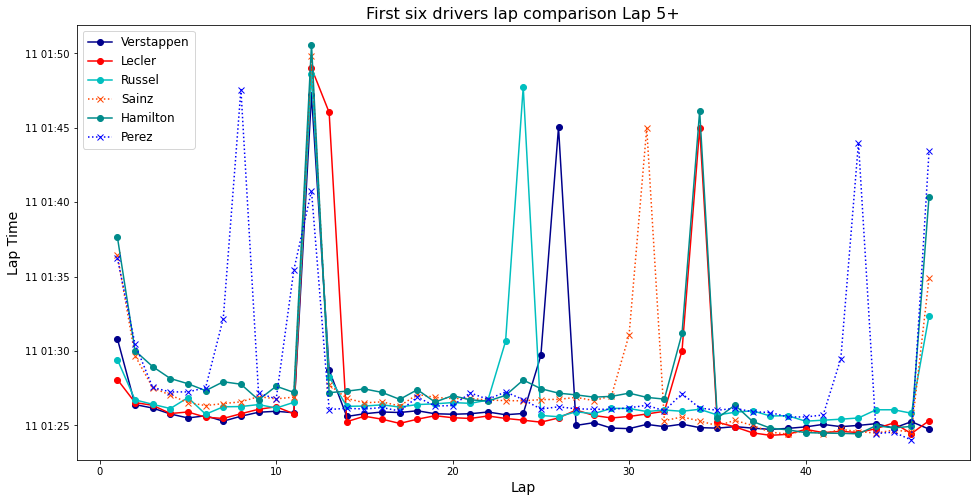

In [24]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x[:47],yV[:47], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x[:47],yL[:47],'ro-', label='Lecler')
ax.plot(x[:47],yR[:47],'co-', label='Russel')
ax.plot(x[:47],yS[:47], color='orangered', linestyle='dotted', marker='x', label='Sainz')
ax.plot(x[:47],yH[:47], color='darkcyan', linestyle='solid', marker='o', label='Hamilton')
ax.plot(x[:47],yP[:47],'bx:', label='Perez')
ax.yaxis_date()
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('First six drivers lap comparison Lap 5+', fontsize=16)
ax.legend(loc='upper left', fontsize=12)
plt.show()
fig.savefig('First six drivers lap comparison Lap 5+.jpeg')

We can see that the fastests cars was between Verstappen and Leclerc, they were so close in the first stint, then after the first stop from Leclerc, he was slightly fast from Verstappen, then when Verstappen made its pit stop, he became faster, at the end they were close in times

And the fastest lap is from Perez so lets find it.

In [25]:
fastest_lap = lap_per.index.values.astype(int)[lap_per['Time PER'] == min(lap_per['Time PER'])]
fastest = min(lap_per['Time PER'])

In [26]:
print('The fastest lap was', fastest, 'on lap', fastest_lap)

The fastest lap was 1:24.030 on lap [46]


Right away after he makes the last pit stop and change tyres on new softs.

## Tyres times comparison 

For the tyre time comparison, the first peak between laps 10 and 15 is due to Sebastian Vettel retirement and in order to analyze the lap times this laps will be delete from the drivers, and also the first lap is not taken in consideration

First let's check the average lap time tyres comparison of Max Verstappen

In [27]:
ver1 = list(range(1,11))+list(range(13,24))
ver_1s = lap_ver.iloc[ver1]
ver_2m = lap_ver.iloc[26:47]

In [28]:
yV_1s = mdates.datestr2num(list(ver_1s['Time VER']))
yV_2m = mdates.datestr2num(list(ver_2m['Time VER']))

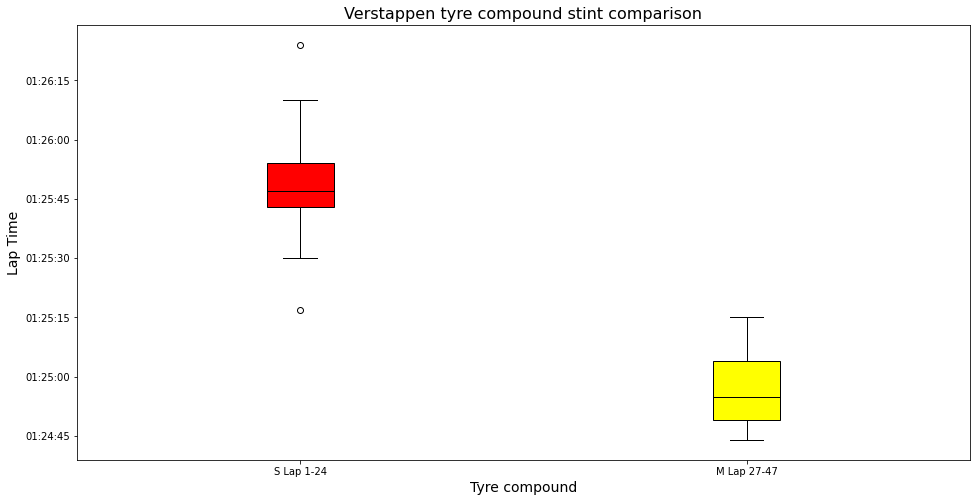

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
bplotV = ax.boxplot((yV_1s,yV_2m),
          patch_artist=True,
          labels = ['S Lap 1-24','M Lap 27-47'],
          medianprops=dict(color='black'))
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Verstappen tyre compound stint comparison', fontsize=16)
bplotV['boxes'][0].set_facecolor('red')
bplotV['boxes'][1].set_facecolor('yellow')
plt.show
fig.savefig('Max Verstappen BP Tyre.jpeg')

Now let's check the times from Leclerc

In [30]:
lec_1s = lap_lec.iloc[1:11]
lec_2m = lap_lec.iloc[13:32]
lec_3s = lap_lec.iloc[34:47]

In [31]:
yL_1s = mdates.datestr2num(list(lec_1s['Time LEC']))
yL_2m = mdates.datestr2num(list(lec_2m['Time LEC']))
yL_3s = mdates.datestr2num(list(lec_3s['Time LEC']))

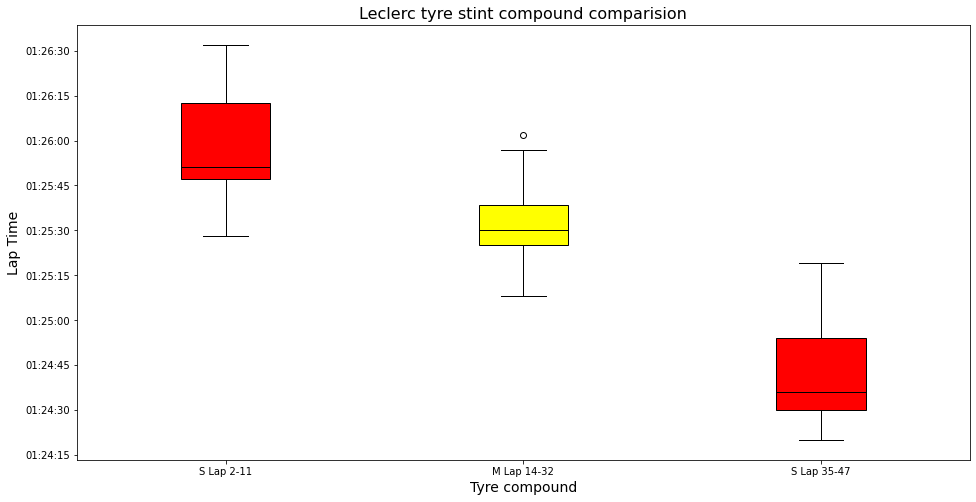

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
bplotL = ax.boxplot((yL_1s, yL_2m, yL_3s),
          patch_artist=True,
          labels = ['S Lap 2-11','M Lap 14-32', 'S Lap 35-47'],
          medianprops=dict(color='black'))
bplotL['boxes'][0].set_facecolor('red')
bplotL['boxes'][1].set_facecolor('yellow')
bplotL['boxes'][2].set_facecolor('red')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Leclerc tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Charles Leclerc BP Tyre.jpeg')

Now let's check for the average lap time of Russell

In [33]:
rus1s = list(range(1,11)) + list(range(13,22))
rus_1s = lap_rus.iloc[rus1s]
rus_2h = lap_rus.iloc[24:46]

In [34]:
yR_1s = mdates.datestr2num(list(rus_1s['Time RUS']))
yR_2h = mdates.datestr2num(list(rus_2h['Time RUS']))

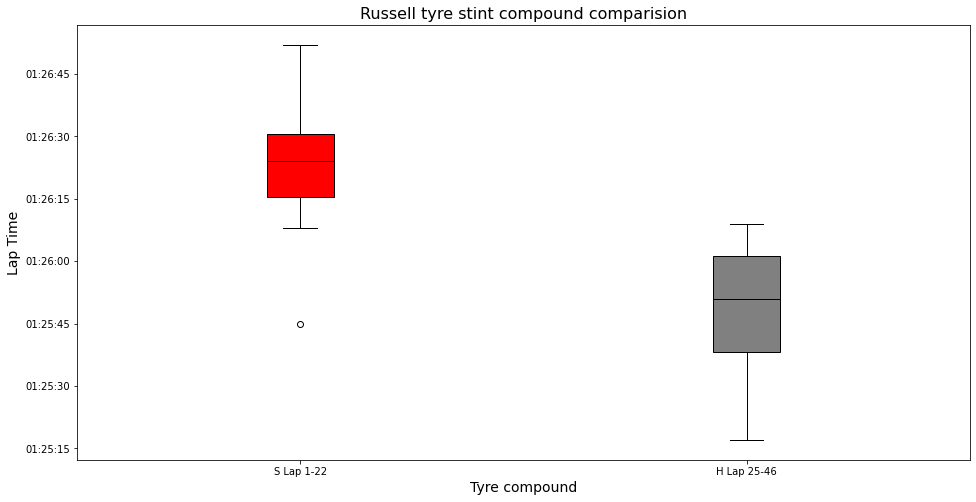

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
bplotR = ax.boxplot((yR_1s,yR_2h),
          patch_artist=True,
          labels = ['S Lap 1-22','H Lap 25-46'],
          medianprops=dict(color='black'))
bplotR['boxes'][0].set_facecolor('red')
bplotR['boxes'][1].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Russell tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('George Russel BP Tyre.jpeg')

Next one is the lap time average of Sainz

In [36]:
sai1m = list(range(1,11)) + list(range(13,29))
sai_1m = lap_sai.iloc[sai1m]
sai_2s = lap_sai.iloc[31:46]

In [37]:
yS_1m = mdates.datestr2num(list(sai_1m['Time SAI']))
yS_2s = mdates.datestr2num(list(sai_2s['Time SAI']))

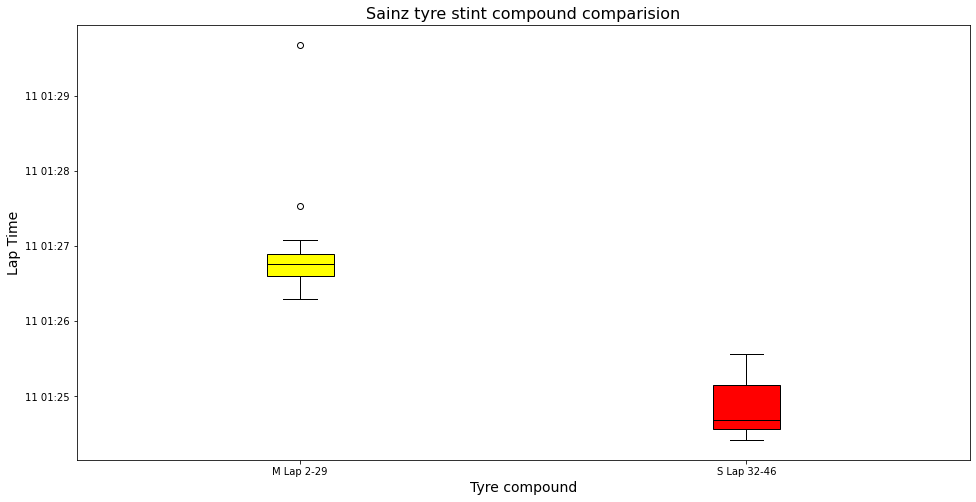

In [38]:
fig, ax = plt.subplots(figsize=(16,8))
bplotS = ax.boxplot((yS_1m,yS_2s),
          patch_artist=True,
          labels = ['M Lap 2-29','S Lap 32-46'],
          medianprops=dict(color='black'))
bplotS['boxes'][0].set_facecolor('yellow')
bplotS['boxes'][1].set_facecolor('red')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Sainz tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Carlos Sainz BP Tyre.jpeg')

Now for Lewis Hamilton

In [39]:
ham1m = list(range(1,11)) + list(range(13,32))
ham_1m = lap_ham.iloc[ham1m]
ham_2s = lap_ham.iloc[34:46]

In [40]:
yH_1m = mdates.datestr2num(list(ham_1m['Time HAM']))
yH_2s = mdates.datestr2num(list(ham_2s['Time HAM']))

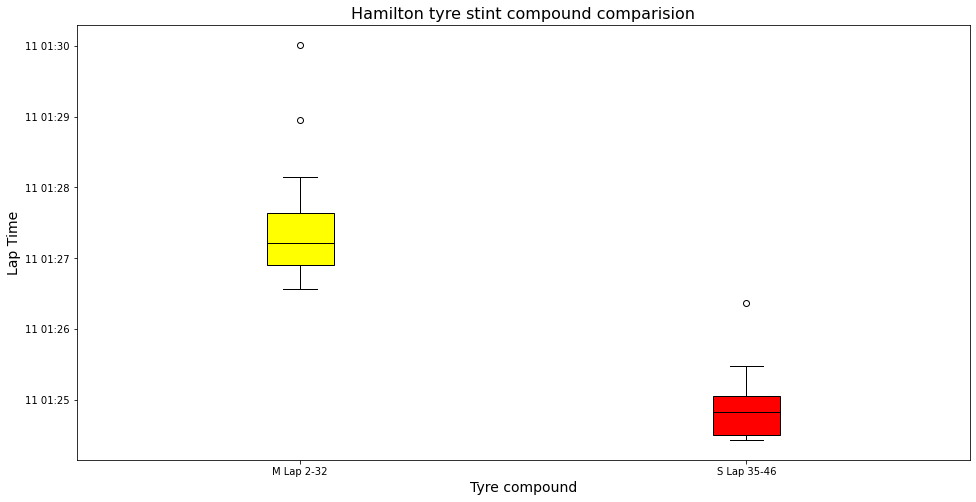

In [41]:
fig, ax = plt.subplots(figsize=(16,8))
bplotH = ax.boxplot((yH_1m,yH_2s),
          patch_artist=True,
          labels = ['M Lap 2-32','S Lap 35-46'],
          medianprops=dict(color='black'))
bplotH['boxes'][0].set_facecolor('yellow')
bplotH['boxes'][1].set_facecolor('red')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Hamilton tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Lewis Hamilton BP Tyre.jpeg')

And finally for Perez, but for the last stint that was after lap 43, there is not much times so it will not be take in count

In [42]:
per_1m = lap_per.iloc[1:6]
per2h = list(range(8,10)) + list(range(12,41))
per_2h = lap_per.iloc[per2h]

In [43]:
yP_1m = mdates.datestr2num(list(per_1m['Time PER']))
yP_2h = mdates.datestr2num(list(per_2h['Time PER']))

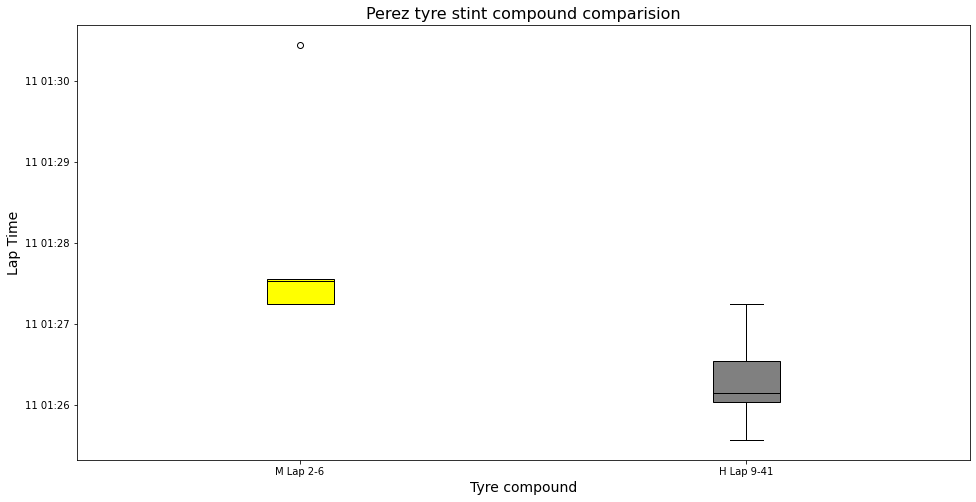

In [44]:
fig, ax = plt.subplots(figsize=(16,8))
bplotP = ax.boxplot((yP_1m,yP_2h),
          patch_artist=True,
          labels = ['M Lap 2-6','H Lap 9-41'],
          medianprops=dict(color='black'))
bplotP['boxes'][0].set_facecolor('yellow')
bplotP['boxes'][1].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Tyre compound', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Perez tyre stint compound comparision', fontsize=16)
plt.show
fig.savefig('Sergio Perez BP Tyre.jpeg')

# Comparison time laps between pilots

Finally let's make a comparison between the pilots, the first stint is from lap 2 to between lap 11, when Leclerc make its first pit stop, trying to take advantage from the virtual safety car

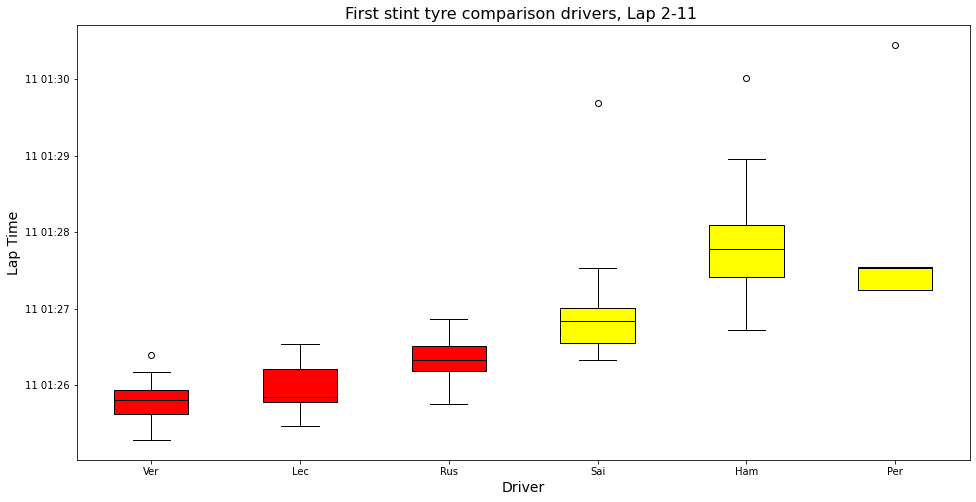

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
bplot1 = ax.boxplot((yV_1s[:10],yL_1s,yR_1s[:10],yS_1m[:10],yH_1m[:10],yP_1m),
          patch_artist=True,
          labels = ['Ver','Lec','Rus','Sai','Ham','Per'],
          medianprops=dict(color='black'))
bplot1['boxes'][0].set_facecolor('red')
bplot1['boxes'][1].set_facecolor('red')
bplot1['boxes'][2].set_facecolor('red')
bplot1['boxes'][3].set_facecolor('yellow')
bplot1['boxes'][4].set_facecolor('yellow')
bplot1['boxes'][5].set_facecolor('yellow')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('First stint tyre comparison drivers, Lap 2-11 ', fontsize=16)
plt.show
fig.savefig('First stint tyre.jpeg')

Now for the second stint which began between the laps 12 and ended in the laps 27, 

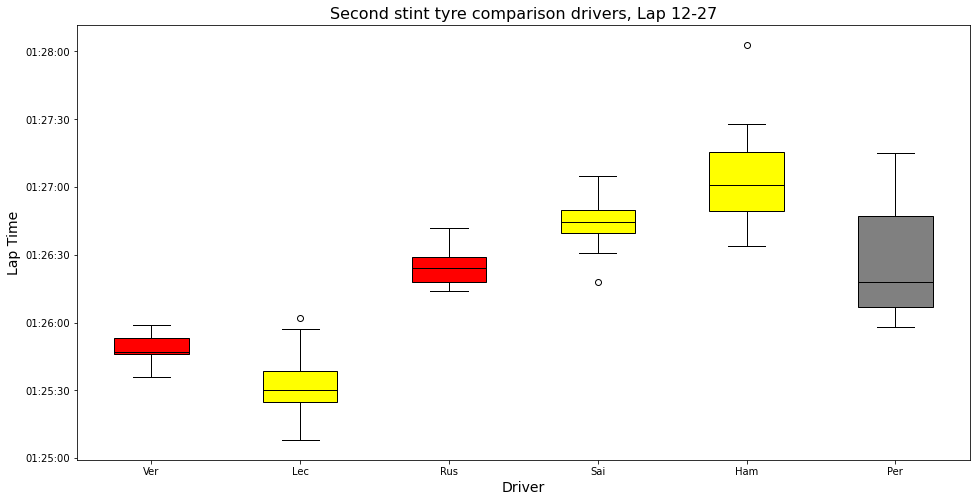

In [47]:
fig, ax = plt.subplots(figsize=(16,8))
bplot2 = ax.boxplot((yV_1s[10:],yL_2m,yR_1s[10:],yS_1m[10:],yH_1m[10:],yP_2h[:17]),
          patch_artist=True,
          labels = ['Ver','Lec','Rus','Sai','Ham','Per'],
          medianprops=dict(color='black'))
bplot2['boxes'][0].set_facecolor('red')
bplot2['boxes'][1].set_facecolor('yellow')
bplot2['boxes'][2].set_facecolor('red')
bplot2['boxes'][3].set_facecolor('yellow')
bplot2['boxes'][4].set_facecolor('yellow')
bplot2['boxes'][5].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Second stint tyre comparison drivers, Lap 12-27', fontsize=16)
plt.show
fig.savefig('Second stint tyre comparison.jpeg')

And finally the third stint

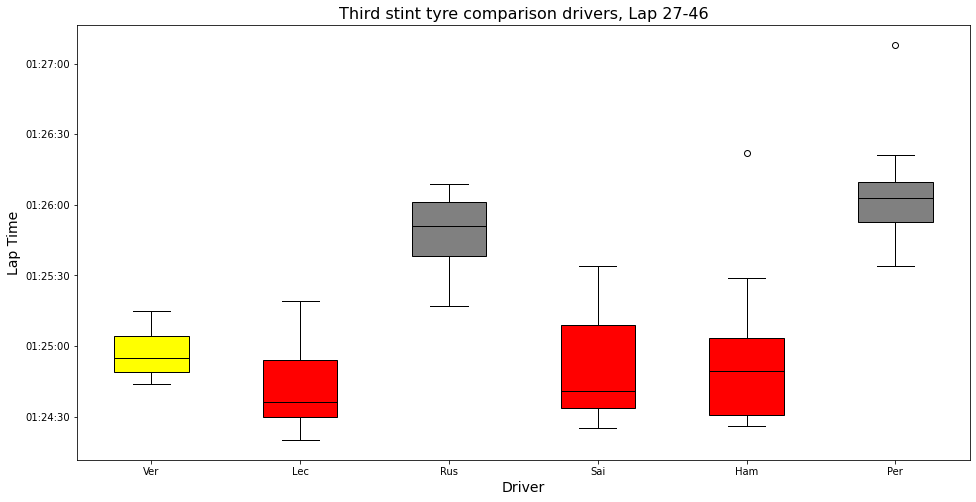

In [48]:
fig, ax = plt.subplots(figsize=(16,8))
bplot3 = ax.boxplot((yV_2m,yL_3s,yR_2h,yS_2s,yH_2s,yP_2h[17:]),
          patch_artist=True,
          labels = ['Ver','Lec','Rus','Sai','Ham','Per'],
          medianprops=dict(color='black'))
bplot3['boxes'][0].set_facecolor('yellow')
bplot3['boxes'][1].set_facecolor('red')
bplot3['boxes'][2].set_facecolor('gray')
bplot3['boxes'][3].set_facecolor('red')
bplot3['boxes'][4].set_facecolor('red')
bplot3['boxes'][5].set_facecolor('gray')
ax.yaxis_date()
ax.set_xlabel('Driver', fontsize=14)
ax.set_ylabel('Lap Time', fontsize=14)
ax.set_title('Third stint tyre comparison drivers, Lap 27-46', fontsize=16)
plt.show
fig.savefig('Third stint tyre comparison.jpeg')

# Timeseries for race position

Finally a time series plot for the position of the first 6 drivers.

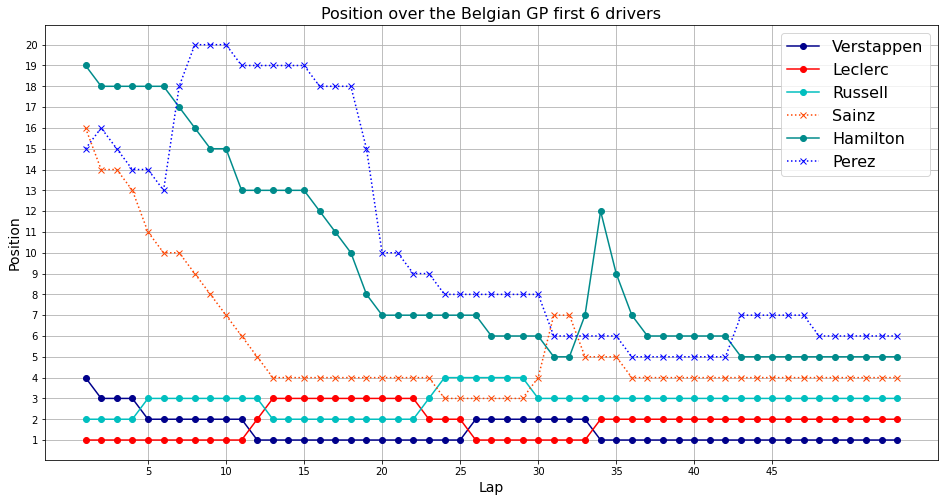

In [49]:
fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, lap_ver['Pos'], color='darkblue', linestyle='solid', marker='o', label='Verstappen')
ax.plot(x, lap_lec['Pos'], 'ro-', label='Leclerc')
ax.plot(x, lap_rus['Pos'], 'co-', label='Russell')
ax.plot(x, lap_sai['Pos'], color='orangered', linestyle='dotted', marker='x', label='Sainz')
ax.plot(x, lap_ham['Pos'], color='darkcyan', linestyle='solid', marker='o', label='Hamilton')
ax.plot(x, lap_per['Pos'], 'bx:', label='Perez')
ax.set_ylabel('Position', fontsize=14)
ax.set_xlabel('Lap', fontsize=14)
ax.set_title('Position over the Belgian GP first 6 drivers', fontsize=16)
ax.legend(loc='upper right', fontsize=16)
plt.yticks(list(range(1,21)))
plt.xticks(list(range(5,50,5)))
ax.grid(True)
plt.show()
fig.savefig('Position over the Belgian GP first 6 drivers.jpeg')